# Capstone Project - The Battle of the Neighborhoods (Week 1)

## Applied Data Science Capstone by IBM/Coursera


# Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction: Business Problem 

In this project we will try to find an optimal location for rentals in Seattle listed on Airbnb. 
There are rentals in Seattle.We will use DataScience to find which area is most preferred rentals in Seattle neighbourhood by the tourists.



# Data

 Based on definition of our problem,we will check for factors that will influence our decision for high number of reviews.


In [1]:
import os # Operating System
import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes
import folium #import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


In [2]:
#Read the data for examination 
import numpy as np
import pandas as pd
df_sr = pd.read_csv(r"seattle_listings.csv")

## 2. Explore and Understand Data
We read the dataset seattle_listings that we collected from https://goo.gl/jcHuwG into a pandas 
data frame and display the first five rows of it as follows:

In [3]:
df_sr.head(5)

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
df_sr.shape

(3818, 92)

# Methodology:
WE will first drop the columns that are not required.


In [5]:
df_sr.columns[:20]

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since'],
      dtype='object')

Out of the first 20 columns we will keep the following:

'listing_id' - to identify the listing
'last_scraped' - we will use it to calculate reviews_per_month
'host_id'
'host_since'

1,2,4,5,6,7,8,9,10,11,12,13,14,15,17,18

And remove all the below:

        'listing_url', 'scrape_id', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url',  'host_url' 

In [6]:
 df_sr.drop(df_sr.columns[[1,2,4,5,6,7,8,9,10,11,12,13,14,15,17]],axis = 1,inplace = True)

#6:17,18

In [7]:


df_sr.shape

(3818, 77)

In [8]:
df_sr.head(2)
# count of columns is reduced from 92 to 77

,listing_id,last_scraped,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,2016-01-04,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [9]:
df_sr.columns[:20]

Index(['listing_id', 'last_scraped', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street'],
      dtype='object')

Keep below columns  
    
host_since - can be used to calculate host experience based on duration since the first listing
host_location - we can use it to establish if host is local or not
host_about - since its only a text we will count number of characters
host_is_superhost - categorical t or f - describing highly rated and relaible hosts - https://www.airbnb.co.uk/superhost
host_has_profile_pic - categorical t or f - profiles with pictures are seen as more credible
host_identity_verified - categorical t or f - another credibility metric

Remove below columns

7,8,9,11,12,13,14,15,16


host_response_time - this value could be useful but contains high percentage of N/A and is contained within score_communication
host_response_rate - same as above
host_acceptance_rate - eaither NA or blank
host_thumbnail_url - host picture is out of scope
host_picture_url - host picture is out of scope
host_neighbourhood - host_location to be instead
host_listings_count - we will use more accurate calculated_host_listings_count
host_total_listings_count - as above
host_verifications - list of host verification methods - information already contained in host_identity_verified


In [10]:
df_sr.drop(df_sr.columns[[7,8,9,11,12,13,14,15,16]],axis = 1,inplace = True)

In [11]:
df_sr.shape

(3818, 68)

In [12]:
df_sr.columns[:25]

Index(['listing_id', 'last_scraped', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type'],
      dtype='object')

Keep below columns:

neighbourhood_cleansed - we will use only for visualisation due to number of 
neighbourhoods while we use gruoupped neighbourhoods instead
neighbourhood_group_cleansed - categorical value which will be used to identify most popular parts of Seattle
latitude - we will use it later to visualise the data on the map
longitude - we will use it later to visualise the data on the map
property_type - categorical variable
Room_type - categorical variable


Below will be removed:
    13,14,15,16,17,18,19
    
        'neighbourhood', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country',  'is_location_exact',
        
        as 
        
city - we already know the city
state - and region being Seattle
zipcode - we will use neighbourhood
market - it is mainly Seattle
smart_location - it is mainly Seattle
country_code - we already know the country
country - as above
is_location_exact - unimportant as it could be inacurate up to 150 meters http://insideairbnb.com/about.html#disclaimers

In [15]:
df_sr.drop(df_sr.columns[[14,15,16,17,18,19]],axis = 1,inplace = True)

In [16]:
df_sr.shape

(3818, 62)

In [17]:
## df_sr.head(2)

df_sr.columns[16:58]

Index(['longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'license',
       'jurisdiction_names', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

 We require below columns:
        
accommodates - discrete value describing property
,bathrooms - another discrete value describing property
,bedrooms - another discrete value describing property
,beds - another discrete value describing property
,bed_type - categorical value describing property
,amenities - due to number of unique features (over 100) we will only concentrate on the total number of amenities
,price - price per night for number of included guests
,security_deposit - another continous value assiociated with the cost
,cleaning_fee - additional cost at the top of rent
,guests_included - descrete value which we will use to evaluate the cost per person
,extra_people - cost of additional person per night
,minimum_nights - another discrete value that is cost related. Listing with high value of minimum nights are likely sublettings
,first_review - we will use it to calculate reviews_per_month
,last_review - we will use this field to filter out no longer active listings
,number_of_reviews - total number of reviews in entire listing history
,review_scores_accuracy - discrete value - numbers between 2 and 10
,review_scores_cleanliness - discrete value - numbers between 2 and 10
,review_scores_checkin - discrete value - numbers between 2 and 10
,review_scores_communication - discrete value - numbers between 2 and 10
,review_scores_location - discrete value - numbers between 2 and 10
,review_scores_value - discrete value - numbers between 2 and 10
,instant_bookable - categorical value - t or false
,cancellation_policy - ordinal value with 5 categories that can be ordered from lowest to highest level of flexibility
,require_guest_profile_picture - categorical value - t or false
,require_guest_phone_verification categorical value - t or false,
,calculated_host_listings_count - continious value which is actual number of host 
,listings - another metric to measure host experience or to distinguish buisness from individual




Remove below:
    
square_feet - could be used to evaluate the property size but most of the values are missing
,weekly_price - mostly blank so we will use price instead
,monthly_price - mostly blank so we will use price instead
,maximum_nights - most of the values are above 30 days suggesting its used as an open bracket
,calendar_updated - we are not interested in future data that is a subject to daily updates
,has_availability - as above
,availability_30 - as above
,availability_60 - as above
,availability_90 - as above
,availability_365 - as above
,calendar_last_scraped - as abovereview_scores_rating - this value is calculated as weighted sum of other scores
,requires_license - all values are t
,license - textual value that is mostly null
,jurisdiction_names - contains only nulls
,is_business_travel_ready - contains one value of f


In [18]:
#df_sr.drop(['square_feet'],axis = 1,inplace = True)

df_sr.drop(['weekly_price','monthly_price','maximum_nights','calendar_updated','has_availability','availability_30',
            'availability_60','availability_90','availability_365','calendar_last_scraped','requires_license',
            'license','jurisdiction_names'],axis = 1,inplace = True)

In [19]:
df_sr.shape

(3818, 49)

In [20]:
df_sr.dtypes

listing_id                            int64
last_scraped                         object
host_id                               int64
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_is_superhost                    object
host_has_profile_pic                 object
host_identity_verified               object
street                               object
neighbourhood                        object
neighbourhood_cleansed               object
neighbourhood_group_cleansed         object
country                              object
latitude                            float64
longitude                           float64
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                        

In [21]:

# Format the date column
df_sr['host_since'] = df_sr['host_since'].apply(pd.to_datetime)
df_sr['first_review'] = df_sr['first_review'].apply(pd.to_datetime)
df_sr['last_review'] = df_sr['last_review'].apply(pd.to_datetime)

  


In [22]:
#Convert string to numeric
#price - conversion from $ to numeric values
#security_deposit - conversion from $ to numeric values
#cleaning_fee - conversion from $ to numeric values
#extra_people - conversion from $ to numeric values

df_sr['price'] = df_sr['price'].str.replace('$','')
df_sr['price'] = df_sr['price'].apply(pd.to_numeric, errors='coerce')
#security_deposit,cleaning_fee 
df_sr['security_deposit'] = df_sr['security_deposit'].str.replace('$','')
df_sr['security_deposit'] = df_sr['security_deposit'].apply(pd.to_numeric, errors='coerce')

df_sr['cleaning_fee'] = df_sr['cleaning_fee'].str.replace('$','')
df_sr['cleaning_fee'] = df_sr['cleaning_fee'].apply(pd.to_numeric, errors='coerce')


df_sr['extra_people'] = df_sr['extra_people'].str.replace('$','')
df_sr['extra_people'] = df_sr['extra_people'].apply(pd.to_numeric, errors='coerce')

In [23]:
df_sr['price'].head(1)

0    85.0
Name: price, dtype: float64

In [24]:
#Fill NA values in seurity_Deposit,price and cleaning_fee to 0.

df_sr['security_deposit'].fillna(0.0,inplace = True)
df_sr['price'].fillna(0.0,inplace = True)
df_sr['cleaning_fee'].fillna(0.0,inplace = True)
df_sr['extra_people'].fillna(0.0,inplace = True)

In [25]:
#We will now apply cleansing / conversion to below fields:

#host_is_superhost - conversion from t/f to 1/0 values
#host_has_profile_pic - conversion from t/f to 1/0 values
#host_identity_verified - conversion from t/f to 1/0 values
#instant_bookable - conversion from t/f to 1/0 values
#require_guest_profile_picture - conversion from t/f to 1/0 values
#require_guest_phone_verification - conversion from t/f to 1/0 values

df_sr['host_is_superhost'] = df_sr['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
df_sr['host_has_profile_pic'] = df_sr['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)
df_sr['host_identity_verified'] = df_sr['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)

df_sr['host_identity_verified'].head()

df_sr.head(2)

,listing_id,last_scraped,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",0,1,1,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,2016-01-04,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,1,1,1,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48


In [26]:
#instant_bookable - conversion from t/f to 1/0 values
#require_guest_profile_picture - conversion from t/f to 1/0 values
#require_guest_phone_verification - conversion from t/f to 1/0 values

df_sr['instant_bookable'] = df_sr['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)
df_sr['require_guest_profile_picture'] = df_sr['require_guest_profile_picture'].apply(lambda x: 1 if x == 't' else 0)
df_sr['require_guest_phone_verification'] = df_sr['require_guest_phone_verification'].apply(lambda x: 1 if x == 't' else 0)

df_sr['require_guest_phone_verification'].head()

df_sr.head(2)

,listing_id,last_scraped,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",0,1,1,...,10.0,10.0,9.0,10.0,0,moderate,0,0,2,4.07
1,953595,2016-01-04,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,1,1,1,...,10.0,10.0,10.0,10.0,0,strict,1,1,6,1.48


In [27]:
#listing_duration = (last_review - first_review) - value to be evaluated in days
listing_duration = df_sr['last_review'] - df_sr['first_review']
df_sr['listing_duration'] = listing_duration

#listing_duration = pd.to_numeric(difftime(df_sr['last_scraped'], df_sr['first_review'], unit = 'days'))

#listing_duration = pd.to_numeric(difftime(df_sr['last_scraped'], df_sr['first_review'], unit = 'days'))

In [28]:
#hosting_duration = (last_review - host_since) - value to be evaluated in days
hosting_duration =  df_sr['last_review'] - df_sr['host_since'] 
df_sr['hosting_duration'] = hosting_duration

In [29]:
#host_local = if(‘Seattle’ in host_location, 1, 0) - we will treat hosts from Barcelona as local

df_sr['host_local'] = df_sr['host_location']
                                                       
df_sr['host_local'] = df_sr['host_local'].apply(lambda x: '1' if x == 'Seattle, Washington, United States' else 0)

In [30]:
#host_about_len = ifelse(is.na(host_about), 0, nchar(host_about)) - in this case NA will be counted as 0
# passing values through str.len() 
df_sr["host_about_len"]= df_sr["host_about"].str.len() 
df_sr['host_about_len'].fillna('0',inplace = True)



In [31]:
#total_amenities = count of listed amenities -
#since is comma delimited we will count number of separators + 1 where number of characters greater than 2 (listing brackets)

df_sr['total_amenities'] = df_sr['amenities']

df_sr["total_amenities"]= df_sr["amenities"].str.count(",")

df_sr["total_amenities"] = df_sr["total_amenities"] + 1

In [32]:
df_sr

,listing_id,last_scraped,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_duration,hosting_duration,host_local,host_about_len,total_amenities
0,241032,2016-01-04,956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",0,1,1,...,moderate,0,0,2,4.07,1523 days,1605 days,1,372,10
1,953595,2016-01-04,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,1,1,1,...,strict,1,1,6,1.48,862 days,1041 days,1,74,16
2,3308979,2016-01-04,16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,0,1,1,...,strict,0,0,2,1.15,400 days,448 days,1,343,21
3,7421966,2016-01-04,9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,0,1,1,...,flexible,0,0,1,NaN,NaT,NaT,1,0,14
4,278830,2016-01-04,1452570,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",0,1,1,...,strict,0,0,1,0.89,1201 days,1425 days,1,354,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,2016-01-04,31148752,Bo,2015-04-13,US,NaN,0,1,1,...,strict,0,0,8,0.30,0 days,167 days,0,0,16
3814,8902327,2016-01-04,46566046,Glen,2015-10-14,"Seattle, Washington, United States",I am a 58 year old male that is married to Mag...,0,1,1,...,moderate,0,0,1,2.00,6 days,71 days,1,374,17
3815,10267360,2016-01-04,52791370,Virginia,2015-12-30,US,NaN,0,1,0,...,moderate,0,0,1,NaN,NaT,NaT,0,0,20
3816,9604740,2016-01-04,25522052,Karen,2015-01-03,"Tacoma, Washington, United States",NaN,0,1,1,...,moderate,0,0,1,NaN,NaT,NaT,0,0,11


In [33]:
#price_per_person - (price/accommodates)
df_sr["price_per_person"] = df_sr["price"] / df_sr["accommodates"]
df_sr.head(2)

,listing_id,last_scraped,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_duration,hosting_duration,host_local,host_about_len,total_amenities,price_per_person
0,241032,2016-01-04,956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",0,1,1,...,0,0,2,4.07,1523 days,1605 days,1,372,10,21.25
1,953595,2016-01-04,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,1,1,1,...,1,1,6,1.48,862 days,1041 days,1,74,16,37.50


In [34]:
#lets analyse listings that have more than 100 reviews
#df_sr100 = df_sr1.query("number_of_reviews >=50")

In [35]:
#df_sr100.shape

df_sr.shape

(3818, 55)

In [36]:
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
#from pandas.core import datetools

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from statsmodels.tools.eval_measures import rmse

In [37]:
#After analysis of the final set,we check various factors on which reviews are dependent.

#Property_type
#Room Type
#cancellation policy
#require_guest_profile_picture
#require_guest_phone_verification
#calculated_host_listings_count
#total_amenities
#price_per_person


  


df_sr.isnull().sum()

df_sr["bed_type"].value_counts()# Bed type not a real indicator for 
#getting high reviews as 3063 rows out of 3196 are of type 'Real Bed'

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

In [38]:
df_sr.groupby(["property_type"]).mean()
#Bungalow              9
#Boat                  5
#Tent                  4
#Dorm                  2
#Treehouse             2
#Chalet                2
#Yurt                  1
df_sr[["property_type","number_of_reviews"]].groupby(["property_type",]).sum()[["number_of_reviews"]]

# house and apartment types have a high impact.Lets put all other property_types in Other type
#The total number of reviews received for property type other than apartment and house is 7122.

#Lets replace property_type with Other.

,number_of_reviews
property_type,
Apartment,36232
Bed & Breakfast,894
Boat,67
Bungalow,74
Cabin,1944
Camper/RV,638
Chalet,12
Condominium,734
Dorm,22


In [39]:
df_sr["property_type"] = df_sr["property_type"].replace({'Bed & Breakfast':'Other', 'Boat':'Other'})
df_sr["property_type"] = df_sr["property_type"].replace({'Bungalow':'Other', 'Cabin':'Other'})
df_sr["property_type"] = df_sr["property_type"].replace({'Camper/RV':'Other', 'Chalet':'Other'})
df_sr["property_type"] = df_sr["property_type"].replace({'Condominium':'Other', 'Dorm':'Other'})
df_sr["property_type"] = df_sr["property_type"].replace({'Loft':'Other', 'Tent':'Other'})
df_sr["property_type"] = df_sr["property_type"].replace({'Treehouse':'Other', 'Yurt':'Other','Townhouse':'Other'})
df_sr[["property_type","number_of_reviews"]].groupby(["property_type",]).sum()[["number_of_reviews"]]


df_sr["review_scores_rating"].fillna(0.0,inplace = True)
df_sr['review_scores_rating'] = df_sr['review_scores_rating'].apply(pd.to_numeric, errors='coerce')

In [40]:
df_sr_dummied = pd.get_dummies(df_sr, columns=["property_type"])

df_sr_dummied.head(2)

df_sr["cancellation_policy"].value_counts()


df_sr_dummied = pd.get_dummies(df_sr_dummied, columns=["cancellation_policy"])

df_sr_dummied.shape
df_sr_dummied.head(2)
#Now considering only ther equired columns

#host_is_superhost
#host_has_profile_pic
#host_identity_verified
#property_type_Apartment
#property_type_House
#property_type_Other
#total_amenities
#price_per_person
#cancellation_policy_moderate
#cancellation_policy_strict
#cancellation_policy_flexible
#number of reviews



,listing_id,last_scraped,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,...,host_local,host_about_len,total_amenities,price_per_person,property_type_Apartment,property_type_House,property_type_Other,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,241032,2016-01-04,956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",0,1,1,...,1,372,10,21.25,1,0,0,0,1,0
1,953595,2016-01-04,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,1,1,1,...,1,74,16,37.50,1,0,0,0,0,1


# Analysis:

In [41]:
df_sr_dm = df_sr_dummied[['host_is_superhost','host_has_profile_pic','host_identity_verified',
                                'total_amenities','price_per_person','review_scores_rating',
                'cancellation_policy_moderate',
                'cancellation_policy_strict','cancellation_policy_flexible','number_of_reviews']]

df_sr_dm.shape

#df_sr_dm.to_excel("airbnb_seattle2.xlsx")

(3818, 10)

In [42]:
#Exclude the rows which have number of reviews > 0
df_sr_dm_1 = df_sr_dm.query( 'number_of_reviews > 0')

df_sr_dm_1.head(5)
  
# display 
#na 

#average rental as per neighbourhood

#relationship between rental and reviews ..review is dependent variable
#independent variables are host_response_rate,properyt_type,room_type,accomodates,price,weekly_price,monthly_price,
#nights_availability,number_of_Reviews,review scores,cancellation_policy,reviwes per month


df_sr_dm_1.shape
##Lets consider the listings that have reviews greater than 100
#df_sr_dm_100 = df_sr_dm_1.query( 'number_of_reviews > 50')

#df_sr_dm_100.shape

(3191, 10)

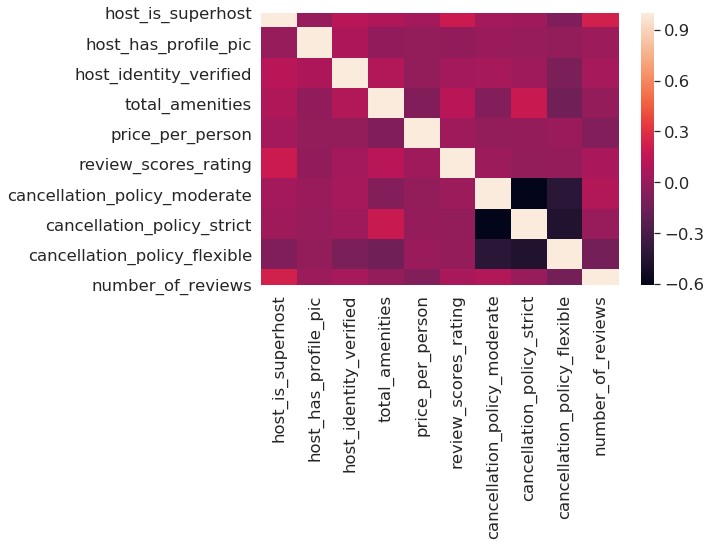

In [43]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

# Checking for independence between features
plt.figure(figsize=(8,5))
sns.heatmap(df_sr_dm_1.corr()) 




In [44]:
#Now checking value of the dependent variable number_of_review is related to which independent variables
airbnb_features = ['host_is_superhost','host_has_profile_pic','host_identity_verified',
                                'total_amenities','price_per_person',
                'cancellation_policy_moderate',
                'cancellation_policy_strict','cancellation_policy_flexible','number_of_reviews']

X = df_sr_dm_1[airbnb_features].values
y = df_sr_dm_1['number_of_reviews']



In [45]:
# Split dataset in training and test datasets
# X_train, X_test = train_test_split(df_train, test_size=0.5, random_state=int(time.time()))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)



In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2233, 9)
(958, 9)
(2233,)
(958,)


In [47]:

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
# Instantiate the classifier
#LogReg = LogisticRegression()
gnb = GaussianNB()

In [48]:
# Train classifier
#LogReg.fit(X_train, y_train)

# Train classifier
gnb.fit(
    X_train,
    y_train
)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
#y_pred = LogReg.predict(X_test)
y_pred = gnb.predict(X_test)

In [50]:
y_pred

array([ 20,  10,  25,  18,  35,  12,  32,   2,  10,   1,   8,   1,  20,
        30,  15,   5,   7,  17,  27,   6,  50,  13,   1,   4,  82,   7,
        30,   1,  29,   8,   7,   9,  28,  54,   4,  99,   7,  64,  71,
       135,  93,  66,  12,  58,   3,  76,   1,  11,   5,  18,  14, 158,
        80,  20,   4,   1,  10,  40, 115,   2,  12,   7,   3,   7,   1,
         1,  10,   3, 182,   1,  24,  12,   2,   4,   1,  12,   2,   5,
         1,  41,  16,   9,   1,   2,   5,   6,  31,  15,  23,   4,   9,
         1,   2,   2,   1,   6,  10,  37,  19,  32,  24,   3,  19,  58,
        12,   7,  31,   5,   9,  12,  86,  82,  17,   4,  21,  25,   4,
         5,  24,   1,   2,  60,  30,  30,  21,   1,  18,  19,   6,   1,
         5,  40,   1,  37,  12,   9,   3,  15,  13,  44,  72,   7,   9,
        18, 158,  17,   1,  43,  27,  12,  27, 121,   2,  29,   1, 135,
        30,   2,   1,  10,  92,  11, 115,   3,  11,  15,   1,  17,  72,
         5,  55,  17,  10,   1,   7,  11,  38,  23,  22,  28,   

In [51]:
metrics.confusion_matrix(y_test, y_pred)

array([[108,   0,   0, ...,   0,   0,   0],
       [  0,  62,   0, ...,   0,   0,   0],
       [  0,   0,  38, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   1,   0]])

In [52]:
metrics.accuracy_score(y_test, y_pred)

0.9478079331941545

In [53]:
len(X_test)

958

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        52
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        27
          16       1.00      1.00      1.00        18
          17       1.00      1.00      1.00        14
          18       1.00    

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Results and Discussion:

Drawing BAR plots to show relationship between independent variables like host_is_superhost,Price,total_amenities 
and dependent variable number of reviews and checking the most suitable neighbourhood in Seattle

In [102]:
df_a =df_sr[["neighbourhood_group_cleansed","host_is_superhost"]].groupby(["neighbourhood_group_cleansed"]).mean()["host_is_superhost"]


#df_sr['neighbourhood_cleansed']

In [103]:
df_b =df_sr[["neighbourhood_group_cleansed","number_of_reviews"]].groupby(["neighbourhood_group_cleansed"]).mean()[["number_of_reviews"]]

In [104]:
DF = pd.concat([df_a, df_b], axis=1)

DF

,host_is_superhost,number_of_reviews
neighbourhood_group_cleansed,,
Ballard,0.265217,30.947826
Beacon Hill,0.152542,28.432203
Capitol Hill,0.149912,21.890653
Cascade,0.179775,15.955056
Central Area,0.271003,22.878049
Delridge,0.240506,27.810127
Downtown,0.198113,23.784906
Interbay,0.181818,11.181818
Lake City,0.179104,15.343284


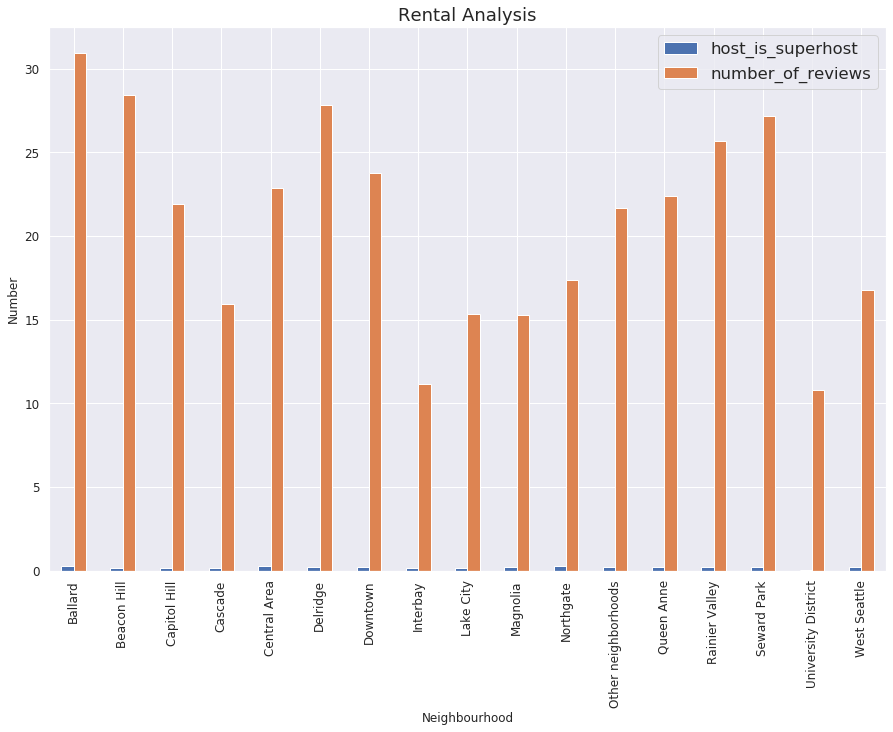

In [105]:
DF = pd.DataFrame(DF)
DF.dtypes

DF
%matplotlib inline 


#plt.figure(figsize=(50,50))
#ax = DF.plot.bar(rot=0)
#axes[1].legend(loc=2)

import matplotlib.pyplot as plt
ax = DF[['host_is_superhost','number_of_reviews']].plot(kind='bar', title ="Rental Analysis", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Neighbourhood", fontsize=12)
ax.set_ylabel("Number", fontsize=12)
plt.show()

In [90]:
df_a =df_sr[["neighbourhood_group_cleansed","total_amenities"]].groupby(["neighbourhood_group_cleansed"]).mean()[["total_amenities"]]


#df_sr['neighbourhood_cleansed']

In [91]:
df_b =df_sr[["neighbourhood_group_cleansed","number_of_reviews"]].groupby(["neighbourhood_group_cleansed"]).mean()[["number_of_reviews"]]

In [92]:
DF = pd.concat([df_a, df_b], axis=1)

DF

,total_amenities,number_of_reviews
neighbourhood_group_cleansed,,
Ballard,13.821739,30.947826
Beacon Hill,13.898305,28.432203
Capitol Hill,13.007055,21.890653
Cascade,13.966292,15.955056
Central Area,13.878049,22.878049
Delridge,14.481013,27.810127
Downtown,17.362264,23.784906
Interbay,15.818182,11.181818
Lake City,14.059701,15.343284


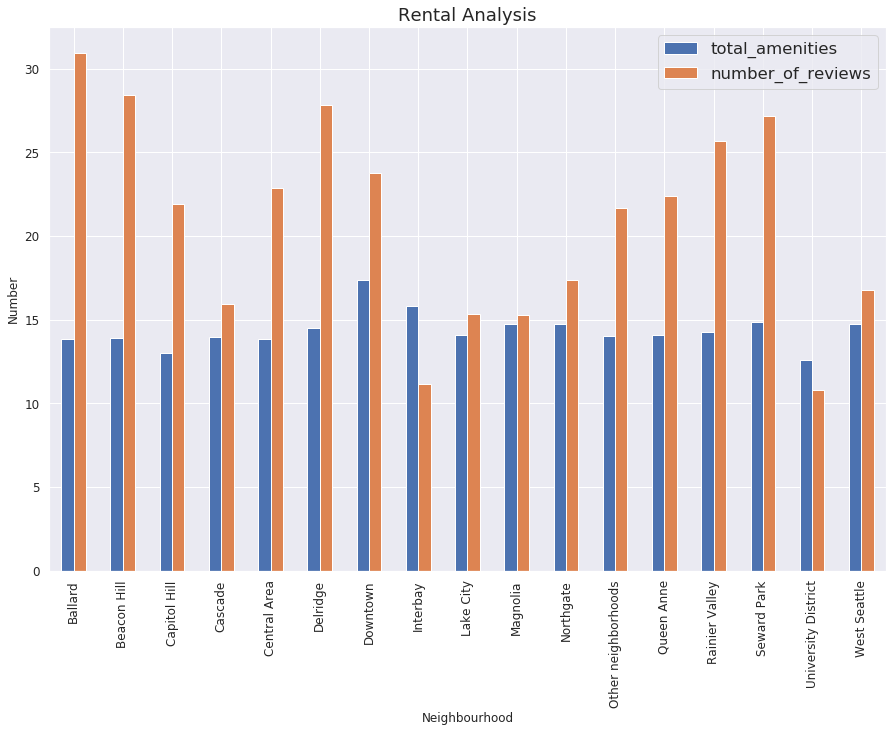

In [93]:
DF = pd.DataFrame(DF)
DF.dtypes

DF
%matplotlib inline 


#plt.figure(figsize=(50,50))
#ax = DF.plot.bar(rot=0)
#axes[1].legend(loc=2)

import matplotlib.pyplot as plt
ax = DF[['total_amenities','number_of_reviews']].plot(kind='bar', title ="Rental Analysis", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Neighbourhood", fontsize=12)
ax.set_ylabel("Number", fontsize=12)
plt.show()

In [55]:
df_a =df_sr[["neighbourhood_group_cleansed","price_per_person"]].groupby(["neighbourhood_group_cleansed"]).mean()[["price_per_person"]]


#df_sr['neighbourhood_cleansed']

In [56]:
df_b =df_sr[["neighbourhood_group_cleansed","number_of_reviews"]].groupby(["neighbourhood_group_cleansed"]).mean()[["number_of_reviews"]]

In [57]:
DF = pd.concat([df_a, df_b], axis=1)

DF

,price_per_person,number_of_reviews
neighbourhood_group_cleansed,,
Ballard,37.774156,30.947826
Beacon Hill,35.453571,28.432203
Capitol Hill,46.814611,21.890653
Cascade,48.767322,15.955056
Central Area,39.594547,22.878049
Delridge,31.179536,27.810127
Downtown,47.829774,23.784906
Interbay,50.772727,11.181818
Lake City,38.123010,15.343284


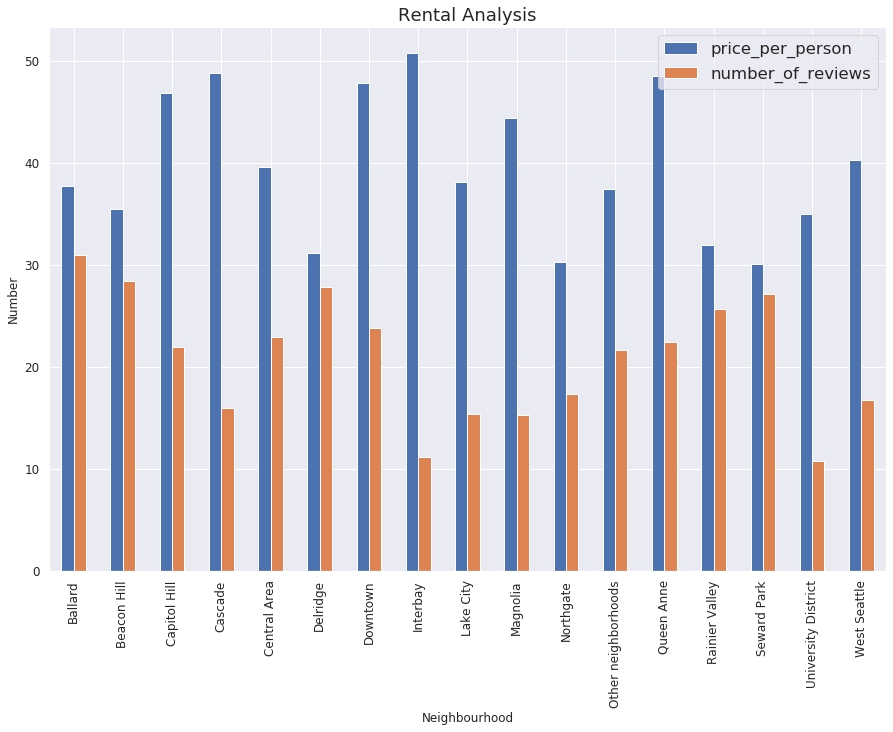

In [58]:
DF = pd.DataFrame(DF)
DF.dtypes

DF
%matplotlib inline 


#plt.figure(figsize=(50,50))
#ax = DF.plot.bar(rot=0)
#axes[1].legend(loc=2)

import matplotlib.pyplot as plt
ax = DF[['price_per_person','number_of_reviews']].plot(kind='bar', title ="Rental Analysis", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Neighbourhood", fontsize=12)
ax.set_ylabel("Number", fontsize=12)
plt.show()

# Conclusion:

Based on above analysis it was found that Ballard is the most preferred neighbourhood for tourists in Airbnb Seattle.

In [71]:
#Map of ballard as the most optimal location for AirBnb tourist in  Seattle

from geopy.geocoders import Nominatim
address = 'Ballard, USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Ballard are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Ballard are 37.0231521, -88.9888619.


In [87]:
df_srb = df_sr.loc[df_sr['neighbourhood_group_cleansed']== 'Ballard']

In [89]:
# create map of Ballard using latitude and longitude values
import folium
map_ballard = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng,price,street in zip(df_srb['latitude'], df_srb['longitude'],df_srb['price'],df_srb['street']):
    label = '{},{}'.format( price,street)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
       [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ballard) 
map_ballard